In [1]:
!pip install xarray

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr
import zarr
import seaborn as sns
import pandas as pd

In [3]:
print(Path.cwd())
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

/Users/kevinha/VYPREarth


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_30208/1535083100.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [4]:
dataset

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

In [5]:
def select_spatio_temporal_data(dataset, initial_timestep, timesteps, latitude, longitude):
    '''
    Desc
    ----
    Method to select a subset of the cube.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    latitude: int
        * vallue in the interval [0,719] where value represents the position of the latitude we want in the latitude array
        * if we want all the latitudes, we set the value = -1
    longitude: int
        * vallue in the interval [0,1439] where value represents the position of the longitude we want in the longitude array
        * if we want all the longitudes, we set the value = -1    
    '''
    
    if(latitude == -1 and longitude == -1):
        return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps))
    
    return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps), latitude=latitude, longitude=longitude)

In [6]:
def select_variable_data(dataset, variable_name):
    '''
    Desc
    ----
    Method to select a particular variable (such as relaive humidity, windspeed, sst etc)
    from the DataCube.
    
    Args
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    '''
    
    return dataset[variable_name]

In [7]:
def earth_graph(dataset, variable_name, initial_timestep, timesteps, latitude=-1, longitude=-1, col_wrap=1):
    '''
    Desc
    ----
    Method to plot whole earth for specific variable for specific time interval.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    col_wrap: int
        *how many graphs will be plotted i the same row
    latitude: int
        * value = -1, that is whole earth
    longitude: int
        * value = -1, that is whole earth
    '''
    
    if (timesteps==1):

        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot()
    else:
        
        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot(x="longitude", 
                                                    y="latitude", 
                                                    col="time", 
                                                    col_wrap=col_wrap)

In [10]:
def prepOneTime(time):
    ba= select_spatio_temporal_data(select_variable_data(dataset, 'BurntArea'), time, 1, -1, -1)
    df= ba.to_dataframe()
    NDVI= select_spatio_temporal_data(select_variable_data(dataset, 'NDVI'), time, 1, -1, -1)
    DCM= select_spatio_temporal_data(select_variable_data(dataset, 'drought_code_max'), time, 1, -1, -1)
    land_surface_temp= select_spatio_temporal_data(select_variable_data(dataset, 'LST_Day_CMG'), time, 1, -1, -1)
    wind= select_spatio_temporal_data(select_variable_data(dataset, 'ws10'), time, 1, -1, -1)
    precip= select_spatio_temporal_data(select_variable_data(dataset, 'tp'), time, 1, -1, -1)
    solar_radiation= select_spatio_temporal_data(select_variable_data(dataset, 'ssr'), time, 1, -1, -1)
    df2= NDVI.to_dataframe()
    df3= DCM.to_dataframe()
    df4= land_surface_temp.to_dataframe()   
    df5= wind.to_dataframe()
    df6= precip.to_dataframe()
    df7= solar_radiation.to_dataframe() 
    
    
    df['NDVI']= df2['NDVI']
    df['DCM']=df3['drought_code_max']
    df['LST']= df4['LST_Day_CMG']
    df['WIND']= df5['ws10']
    df['PRECIP']=df6['tp']
    df['SSR']= df7['ssr']
    
    dfRet= df.dropna()
    return dfRet

In [11]:
df1=prepOneTime(0)

In [21]:
def plot(dframe):
    sns.violinplot(x=dframe["BurntArea"], width=500)
    sns.displot(dframe, x="NDVI")
    sns.displot(dframe, x="DCM")
    sns.displot(dframe, x="LST")
    sns.displot(dframe, x="WIND")
    sns.displot(dframe, x="PRECIP")
    sns.displot(dframe, x="SSR")
    

In [22]:
df1.head()

BurntArea      NDVI        DCM  \
time                latitude longitude                                   
2001-01-01 12:00:00 62.125   -165.625         0.0 -0.126051  19.000000   
                             -165.375         0.0 -0.114740  31.666666   
                             -164.125         0.0 -0.067969   0.000000   
                             -163.875         0.0 -0.088074   0.000000   
                             -163.625         0.0 -0.065140   0.000000   

                                                 LST      WIND    PRECIP  \
time                latitude longitude                                     
2001-01-01 12:00:00 62.125   -165.625   12775.857422  7.739395  7.308506   
                             -165.375   12742.000000  6.706646  6.885376   
                             -164.125   12867.200195  4.778048  7.764235   
                             -163.875   12822.000000  4.759058  8.507772   
                             -163.625   12862.000000  4.776716  9.261845   

                                             SSR  
time                latitude longitude            
2001-01-01 12:00:00 62.125   -165.625   0.167135  
                             -165.375   0.157442  
                             -164.125   0.187972  
                             -163.875   0.186344  
                             -163.625   0.184363

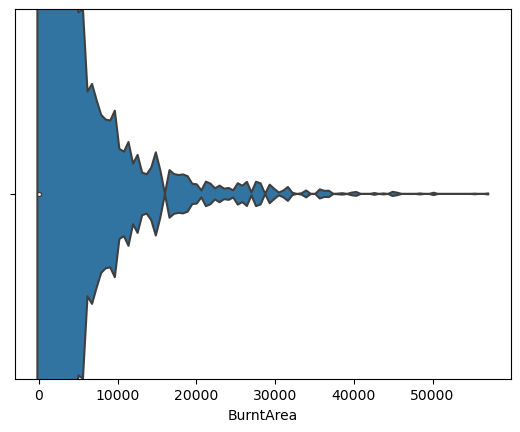

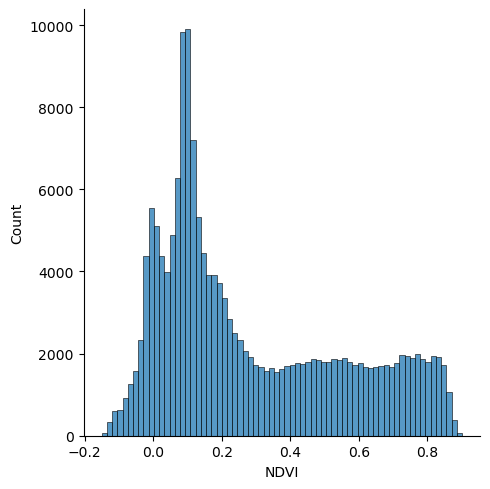

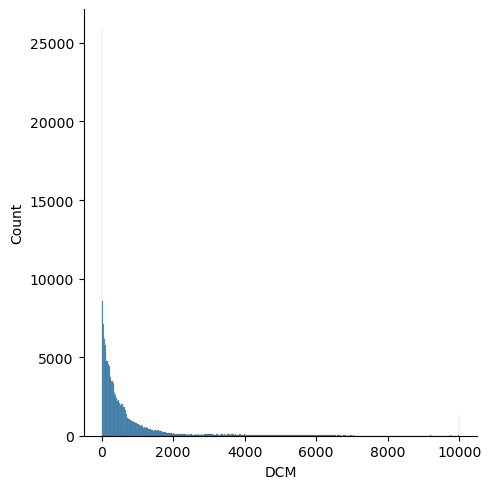

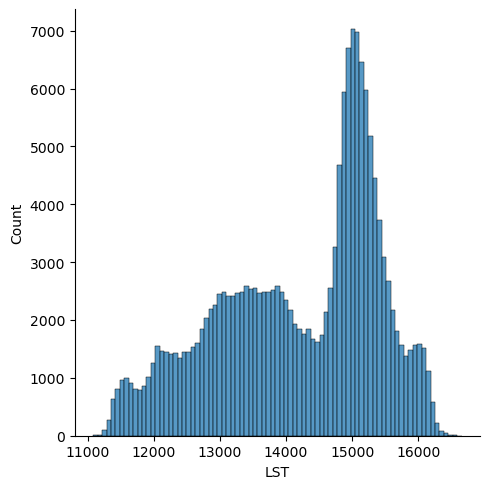

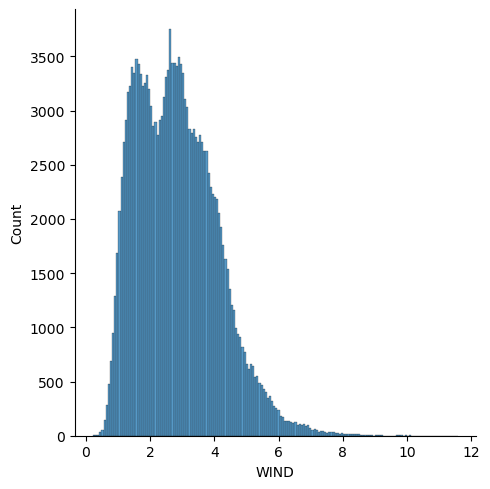

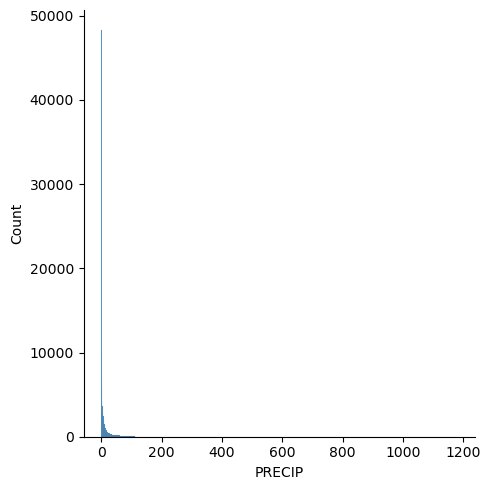

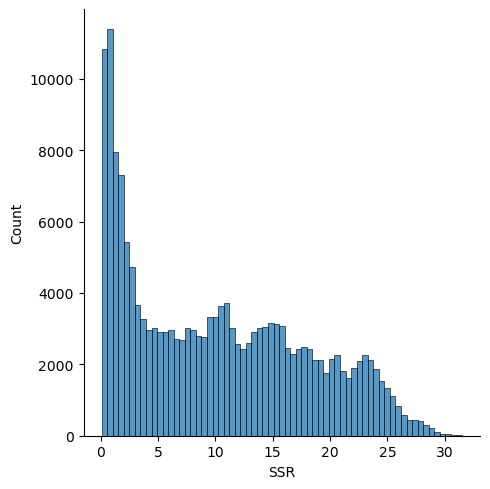

In [23]:
plot(df1)

In [24]:
actual_dataset=[df1]
for x in range(2,1000,10):
    actual_dataset.append(prepOneTime(x))
    
    
    

In [25]:
type(actual_dataset[1])

pandas.core.frame.DataFrame

In [26]:
result = pd.concat(actual_dataset)

In [27]:
result

BurntArea      NDVI        DCM  \
time                latitude longitude                                   
2001-01-01 12:00:00  62.125  -165.625         0.0 -0.126051  19.000000   
                             -165.375         0.0 -0.114740  31.666666   
                             -164.125         0.0 -0.067969   0.000000   
                             -163.875         0.0 -0.088074   0.000000   
                             -163.625         0.0 -0.065140   0.000000   
...                                           ...       ...        ...   
2015-11-01 12:00:00 -55.125  -69.125          0.0  0.410810  12.366667   
                             -67.875          0.0  0.639253  20.700001   
                             -66.375          0.0  0.713457  17.816668   
                    -55.375  -69.375          0.0  0.452166  12.885417   
                             -68.625          0.0  0.499152  16.490885   

                                                 LST       WIND     PRECIP  \
time                latitude longitude                                       
2001-01-01 12:00:00  62.125  -165.625   12775.857422   7.739395   7.308506   
                             -165.375   12742.000000   6.706646   6.885376   
                             -164.125   12867.200195   4.778048   7.764235   
                             -163.875   12822.000000   4.759058   8.507772   
                             -163.625   12862.000000   4.776716   9.261845   
...                                              ...        ...        ...   
2015-11-01 12:00:00 -55.125  -69.125    14137.500000   5.764315  84.634621   
                             -67.875    14442.000000   7.826408  50.943581   
                             -66.375    14258.000000  11.787633  38.044842   
                    -55.375  -69.375    14212.000000  12.611184  82.557579   
                             -68.625    14281.000000  12.026964  74.057945   

                                              SSR  
time                latitude longitude             
2001-01-01 12:00:00  62.125  -165.625    0.167135  
                             -165.375    0.157442  
                             -164.125    0.187972  
                             -163.875    0.186344  
                             -163.625    0.184363  
...                                           ...  
2015-11-01 12:00:00 -55.125  -69.125     5.442083  
                             -67.875    14.107767  
                             -66.375    13.316766  
                    -55.375  -69.375     7.979514  
                             -68.625    10.024096  

[14624159 rows x 7 columns]

In [29]:
result.to_csv("result.csv")

In [30]:
result

BurntArea      NDVI        DCM  \
time                latitude longitude                                   
2001-01-01 12:00:00  62.125  -165.625         0.0 -0.126051  19.000000   
                             -165.375         0.0 -0.114740  31.666666   
                             -164.125         0.0 -0.067969   0.000000   
                             -163.875         0.0 -0.088074   0.000000   
                             -163.625         0.0 -0.065140   0.000000   
...                                           ...       ...        ...   
2015-11-01 12:00:00 -55.125  -69.125          0.0  0.410810  12.366667   
                             -67.875          0.0  0.639253  20.700001   
                             -66.375          0.0  0.713457  17.816668   
                    -55.375  -69.375          0.0  0.452166  12.885417   
                             -68.625          0.0  0.499152  16.490885   

                                                 LST       WIND     PRECIP  \
time                latitude longitude                                       
2001-01-01 12:00:00  62.125  -165.625   12775.857422   7.739395   7.308506   
                             -165.375   12742.000000   6.706646   6.885376   
                             -164.125   12867.200195   4.778048   7.764235   
                             -163.875   12822.000000   4.759058   8.507772   
                             -163.625   12862.000000   4.776716   9.261845   
...                                              ...        ...        ...   
2015-11-01 12:00:00 -55.125  -69.125    14137.500000   5.764315  84.634621   
                             -67.875    14442.000000   7.826408  50.943581   
                             -66.375    14258.000000  11.787633  38.044842   
                    -55.375  -69.375    14212.000000  12.611184  82.557579   
                             -68.625    14281.000000  12.026964  74.057945   

                                              SSR  
time                latitude longitude             
2001-01-01 12:00:00  62.125  -165.625    0.167135  
                             -165.375    0.157442  
                             -164.125    0.187972  
                             -163.875    0.186344  
                             -163.625    0.184363  
...                                           ...  
2015-11-01 12:00:00 -55.125  -69.125     5.442083  
                             -67.875    14.107767  
                             -66.375    13.316766  
                    -55.375  -69.375     7.979514  
                             -68.625    10.024096  

[14624159 rows x 7 columns]